In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
file_path = "training_data_v2.xlsx"
df = pd.read_excel(file_path)
print(df.head())

   Index  Category     dim_1     dim_2     dim_3     dim_4     dim_5  \
0      0         0 -0.882278 -0.647234  0.050173 -0.448188 -0.175582   
1      1         0 -0.702665 -0.462591  0.162085 -0.029182 -0.280842   
2      2         0 -0.327257 -0.397209  0.035037 -0.064671 -0.435734   
3      3         0 -0.793734 -0.470964 -0.278644 -0.292047 -0.565868   
4      4         0 -0.272840 -0.556684  0.001737 -0.229906 -0.495732   

      dim_6     dim_7     dim_8  ...   dim_759   dim_760   dim_761   dim_762  \
0  0.125284 -0.335781 -0.396106  ...  0.568470 -0.326577  0.026089 -0.407658   
1  0.047459  0.109864 -0.540210  ...  0.249440 -0.422917  0.033820 -0.226271   
2  0.535525  0.134867 -0.213102  ...  0.710835 -0.191510 -0.068998 -0.262279   
3  0.546791  0.604674 -0.069190  ...  0.387789 -0.596448 -0.291108 -0.320205   
4  0.176596 -0.141926 -0.352247  ...  0.660122 -0.534026  0.347033 -0.279629   

    dim_763   dim_764   dim_765   dim_766   dim_767   dim_768  
0 -0.162295 -0.121949 

In [3]:
df.describe()

,Index,Category,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_759,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,dim_768
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,1.50000,-0.546620,-0.240519,0.058317,-0.047857,-0.243504,-0.090861,0.093526,-0.016254,...,0.328302,-0.270569,0.098921,-0.224674,-0.137828,0.236189,-0.246182,-0.291699,0.141383,0.216480
std,57.879185,1.12084,0.236888,0.256792,0.314058,0.222581,0.226386,0.340756,0.235409,0.313071,...,0.205390,0.297456,0.250527,0.220183,0.229974,0.291826,0.231220,0.303031,0.322576,0.266404
min,0.000000,0.00000,-1.121956,-1.001693,-0.908712,-0.827861,-0.924105,-0.732294,-0.446348,-0.790324,...,-0.180615,-0.879885,-0.584371,-1.201063,-0.676234,-0.440543,-0.935225,-1.063303,-0.801644,-0.486775
25%,49.750000,0.75000,-0.720922,-0.392404,-0.129015,-0.188668,-0.398378,-0.344402,-0.087952,-0.193500,...,0.210263,-0.506466,-0.059936,-0.376501,-0.298019,0.049810,-0.385772,-0.509874,-0.089659,0.009552
50%,99.500000,1.50000,-0.534315,-0.206723,0.081660,-0.042605,-0.258152,-0.108188,0.084100,0.004945,...,0.314256,-0.288718,0.125603,-0.239438,-0.163152,0.204734,-0.238548,-0.289111,0.147533,0.199927
75%,149.250000,2.25000,-0.384230,-0.060458,0.234395,0.093735,-0.098764,0.135029,0.279256,0.176409,...,0.480700,-0.067805,0.268268,-0.070102,0.026927,0.405521,-0.089596,-0.071831,0.369679,0.414727
max,199.000000,3.00000,0.076175,0.285553,0.885705,0.566412,0.711412,1.207724,0.607074,0.777220,...,0.786255,0.617895,0.695414,0.283994,0.498153,1.057997,0.305519,0.431136,0.892977,0.881348


In [37]:
#df.isnull().sum() # no empty values
if df.isnull().values.any():
    print("There are empty values in the dataframe:")
    print(df.isnull().sum())
else:
    print("No empty values found in the dataframe.")

No empty values found in the dataframe.


In [33]:
pca = PCA(n_components=2) # summarize 768 datapoint into two
X = df.drop(columns=['Index', 'Category'])
principal_components = pca.fit_transform(X)
principal_components.shape

(200, 2)

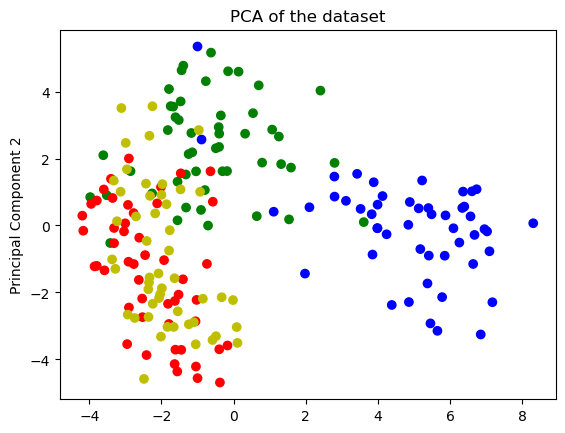

In [38]:
ground_truth = df["Category"].values
unique_classes = np.unique(ground_truth)
colors = ['b', 'g', 'r', 'y']  # You can define more colors as needed
color_map = {c: colors[i % len(colors)] for i, c in enumerate(unique_classes)}
point_colors = [color_map[c] for c in ground_truth]

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=point_colors)

plt.ylabel('Principal Component 2')
plt.title('PCA of the dataset')
plt.show()

Blue represents "Healthcare" category, Green represents "AI" category, Red represents "IoT" category, Yellow represents "Blockchain" category. This visualization shows "AI", "IoT" and "Blockchain" slightly clumps together which is expected. Besides, "Healthcare" is much distant from those technology categories. This proves the feasibility and correctness of the dataset which start from webscape, and then the paragraphs are being tokenized. This dataset is ready to be used for Supervised and Unsupervised Learning!